#Hoofdstuk 1
importing dataset through github

In [ ]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DataRepo2019/Data-files/master/titanic.csv')
# Show the first few records of the Data Frame
titanic.head()

importing through drive

In [ ]:
# Ensure your Google Drive is accessible from within the notebook
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from your Google Drive (here, we stored it in a subfolder
# called "data")
titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic.csv')
titanic.head()

Setting index

In [ ]:
titanic = titanic.set_index(['PassengerId'])

Converting to nominale of ordinale dtype

In [ ]:
# Convert to a categorical variable
titanic.Survived = titanic.Survived.astype('category')
# Convert to a Ordinale variable
embarked_type = CategoricalDtype(categories=['S', 'C', 'Q'], ordered=True)
titanic.Embarked = titanic.Embarked.astype(embarked_type)

##Berekeningen + setting up data

###Berekeningen

In [ ]:
##Berekeningen
print(f"Unieke waarde :   {titanic['Sex'].unique()}")
print(f"describe :   {titanic.Survived.describe()}")
# How many  rows does the DataFrame have?
print(f"Number of rows: {len(titanic)}")
# How many columns?
print(f"Number of columns: {len(titanic.columns)}")
# How many rows and columns, i.e. the shape
print(f"The shape of the Data Frame is: {titanic.shape}")
# General information about the DataFrame

print(f"info :   {titanic.info()}")
# Give the data type of each column.

print(f"dtypes :   {titanic.dtypes}")
# How many columns of each data type are there?
#   Watch it! The book says to use get_dtype_counts(), but this method no longer exists
print(titanic.dtypes.value_counts())


###Setting up data

In [ ]:
##Setting up data
titanic = titanic.dropna() # Drop any row that has at least one missing value
###replacing
titanic.Height = titanic.Height.str.replace(',','').astype(float)

#Hoofdstuk 2

##Berekeningen van spreidingsmaten

In [ ]:
# Centrality and dispersion deasures
# Mean, standard deviation & friends
print(f"Mean:                {tips['tip'].mean()}")
print(f"Standard deviation:  {tips['tip'].std()}") # Pay attention: n-1 in the denominator
print(f"Variance:            {tips['tip'].var()}") # Pay attention: n-1 in the denominator
print(f"Skewness:            {tips['tip'].skew()}")
print(f"Kurtosis:            {tips['tip'].kurtosis()}")

# Median & co
print(f"Minimum:   {tips['tip'].min()}")
print(f"Median:    {tips['tip'].median()}")
print(f"Maximum:   {tips['tip'].max()}")
percentiles = [0.0, 0.25, 0.5, 0.75, 1.0]
print("Percentiles", percentiles, "\n", tips['tip'].quantile(percentiles))
print("Inter Quartile Range:", tips['tip'].quantile(.75) - tips['tip'].quantile(.25))
print(f"Range :    {tips['tip'].max() - tips['tip'].min()}")

#Visualisatie

## Qualitative Variables

### Visualisation using a Bar Chart

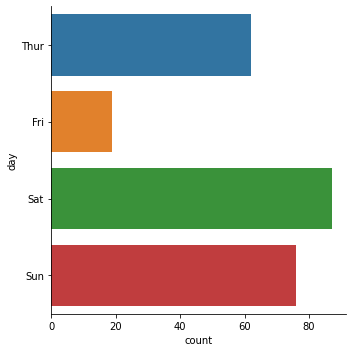

In [ ]:
# Bar chart in Seaborn: catplot() with 'kind = "count"''
sns.catplot(data = tips, kind = "count", y = "day");

## Quantitative Variables

###Boxplot

In [ ]:
# Visualisation using a box plot (Seaborn)
sns.boxplot(data = tips, x = "tip");

###Histogram met of zonder KDE

In [ ]:
#Met KDE
sns.displot(x = tips['tip'], kde=True);

#Zonder KDE
sns.displot(x = tips['tip'], kde=True);

#Hoofdstuk 3


##Ploting normaal verdeling

In [ ]:
mu = 0    # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, num=201)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.title("Standard Normal Distribution")

##betrouwbaarheidsintervallen
###n>=30

In [ ]:
import math
# Step 1.
m = 324.6      # Sample mean
s = 2.5      # Population standard deviation
n = 45      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

###n<30


In [ ]:
import math

# Step 1.
m = 324.6      # Sample mean
s = 2.5      # Population standard deviation
n = 15      # Sample size
alpha = .05  # 1 - alpha is the confidence level

# Step 2.
t = stats.t.isf(alpha/2, df = n - 1)
print("t-score: %.5f" % t)

# Step 3.
lo = m - t * s / np.sqrt(n)
hi = m + t * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

##Hypothese testen

###Right tailed Z-Test
**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 3.483$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.


In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")
    
# Critical value according to the formula in the lecture slides
#g = m0 + stats.norm.isf(a) * s / np.sqrt(n)         
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

##Left-tailed Z-test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.117  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Calculate the test statistic: $\overline{x} = 3.117$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [ ]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")
    
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-a, loc=m0, scale=(s / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

##Left-tailed Z-test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu < 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.117  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Calculate the test statistic: $\overline{x} = 3.117$

**Step 4.** Determine the $p$-value and reject $H_0$ if $p < \alpha$.

In [ ]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n)) # Let op! cdf() ipv sf()!
print("p-waarde: %.5f" % p)
if(p < a):
    print("p < a, dus H0 verwerpen")
else:
    print("p > a, dus H0 niet verwerpen")
    
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-a, loc=m0, scale=(s / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

## The two-tailed $z$-test

When we don't want to test whether the population mean is either greater or lower than a hypothetical value, but only want to know if the sample mean is "close enough", we can use a two-tailed $z$-test.

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu \ne 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$


In [ ]:
# Properties of the sample:
n = 30      # sample size
sm = 3.483  # sample mean
s = 0.55    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the test statistic $\overline{x} = 3.483$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha/2$ (why do we divide by 2?).

In [ ]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < a/2):
    print("p < a/2, dus H0 verwerpen")
else:
    print("p > a/2, dus H0 niet verwerpen")

In this case, we have two critical values: $g_1$ on the left of the mean and $g_2$ on the right. The acceptance region still has area $1-\alpha$ and the critical region has area $\alpha$.

In [ ]:
g1 = m0 - stats.norm.isf(a/2) * s / np.sqrt(n)
g2 = m0 + stats.norm.isf(a/2) * s / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < sm and sm < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % sm)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % sm)


## Right-tailed $t$-test

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 3.3$
- $H_1: \mu > 3.3$

**Step 2.** Choose significance level, e.g. $\alpha = 0.05$

In [ ]:
# Properties of the sample:
n = 20      # sample size
sm = 3.483  # sample mean
ss = 0.55   # sample(!) standard deviation
a = 0.05    # significance level (chosen by the researcher)
m0 = 3.3    # hypothetical population mean (H0)

**Step 3.** Determine the test statistic $\overline{x} = 3.483$

**Step 4.** Calculate the $p$-value and reject $H_0$ if $p < \alpha$

In [ ]:
# Remark that we use the t-distribution here!
p = p = stats.t.sf(sm, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0") 
g = stats.t.isf(a, loc=m0, scale=ss/np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

#Hoofstuk 4: 2 kwalitatieve variabelen


##$\chi^2$ + cramers-v



1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)

In [ ]:
alpha = 0.05
observed = pd.crosstab(wijn.Muziek, wijn.Wijn)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % dof)
print("P-value           : %.4f" % p)

cramers_v = np.sqrt(chi2 / ((min(observed.shape)-1) * n))
print('Cramers-V:',cramers_v)
g = stats.chi2.isf(alpha, df=dof)
print('g-value:', g)

To draw a conclusion from the cramer-v, compare it with the values in the table below:

| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

conclusie 𝜒2, g, p en alpha:

| uitkomst | Interpretation          |
| :---:      | :---                    |
| 𝜒2< 𝑔       |do not reject H0          |
| 𝜒2> 𝑔       | reject 𝐻0       |
| 𝑝 > 𝛼      | do not reject 𝐻0    |
| 𝑝 < 𝛼      | reject 𝐻     |



###Stacked bar chart
Another way to visualize the data is by stacking the bars instead of clustering them. Unfortunately, Seaborn doesn't provide us with a convenient method to do so. However, a crosstab object (actually a Pandas DataFrame) has a plot method that we can use. Remark that we swapped the variables when calling the crosstab function.

In [ ]:
# Contingency table without the margins - Chi Squared
observed = pd.crosstab(rlanders.Gender, rlanders.Survey)

# Horizontally oriented stacked bar chart - Goodness of Fit Test
observed.plot(kind='barh', stacked=True)

###countplot

In [ ]:
sns.countplot(data = products, x = 'Choice')


## Goodness-of-fit test




1. Formulate the hypotheses:
   - $H_0$: The sample is representative of the population, i.e. the frequency of each class within the sample corresponds well to that in the population.
   - $H_1$: The sample is *not* representative of the population, i.e. the differences with the expected frequencies are too large.

In [ ]:
types =               ['mutant', 'human', 'alien', 'god', 'demon']
observed =   np.array([   127,      75,      98,     27,     73])
expected_p = np.array([   .35,     .17,     .23,    .08,    .17])

In [ ]:


alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value

# Goodness-of-fit-test in Python:
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

## Cochran's rule

A chi-squared test can only give good results if you have enough observations in each category. The statistician Cochran (1954) formulated a rule of thumb to determine what exactly *enough* is on contingency tables larger than 2x2:

- All expected values must be at least 1
- At most 20% of the expected values may be smaller than 5

#Hoofdstuk 5

##The 2 sample t-test


The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In [ ]:
stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

#mogelijke waarden voor alternative = greater, less, two-sided

##The t-test for paired samples


The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction time is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction time is significantly higher in the treatment group compared to the control group)

In [ ]:
# Paired t-test with ttest_rel()
statistic, pvalue = stats.ttest_rel(regular, additives, alternative='less')
print(f'p-waarde is: ', pvalue)

conclusie p en alpha:

| uitkomst | Interpretation          |
| :---:      | :---                    |
| 𝑝 > 𝛼      | do not reject 𝐻0    |
| 𝑝 < 𝛼      | reject 𝐻0     |

#Cohen's  d

In [ ]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std(ddof=1)**2 +
                          (nb-1) * b.std(ddof=1)**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [ ]:
cohen_d(regular, additives)

| Cohen's D| Effect size          |
| :---:      | :---                    |
| 0.01          | Very small         |
| 0.2        | Small       |
| 0.5       | Average    |
| 0.8       | Large      |
| 1.2       | Very Large |
| 2         | Huge    |

#visualisatie

In [ ]:
sns.barplot(data=tips, x='sex', y='tip', ci='sd');

In [ ]:
sns.barplot(data=[temperatures.time1,temperatures.time2] , errorbar='sd');

#Hoofdstuk 6: 2 kwantitatieve variabelen


###Scatterplot tekenen
The independent variable should be mapped to the X-axis, the dependent variable to the Y-axis.

In [ ]:
#Zonder regressie rechte
sns.relplot(data=penguins,
            x='bill_depth_mm', y='bill_length_mm',
            size='body_mass_g', 
            hue='species', style='sex')

#Met regressie rechte
sns.regplot(x=male_chinstrap.flipper_length_mm, y=male_chinstrap.body_mass_g)

##berekenen van de regressie rechte $$\hat{y} = \beta_0 + \beta_1 x.$$




In [ ]:
from sklearn.linear_model import LinearRegression

x = male_chinstrap.flipper_length_mm.values.reshape(-1,1)
y = male_chinstrap.body_mass_g

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

In [ ]:
## predictie voor model voor waarde x = 2035
print(model.predict([[2035]])[0])

##Coverance

In [ ]:
np.cov(families.x, families.y, ddof=1)[0][1]

##Correlatie coefficient + coeffienct van determinatie

In [ ]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
# correlatie coefficient
cor = np.corrcoef(families.x, families.y)[0][1]
print(f"R = {cor}")

#Coefficient van determinatie
print(f'Coefficient van determinatie: ' , cor**2)

| R| interpretatie scatterplot        | verband |
| :---:      | :---                    |:---                    |
| dichtbij 1 of -1          | punten op scatterplot liggen dicht bij de rechte         | sterk | 
| dichtbij 0       | punten op scatterplot liggen ver van de rechte         | zwak |


| R| interpretatie rechte       |
| :---:      | :---                    |
| R > 0          | stijgend verband        |
| R < 0          | dalend verband        |
| R = 0          | geen verband        |


| abs(R)| R^2| interpretatie verband       |
| :---:      | :---                    | :---                    |
| < 0.3         | < 0.1| very weak        |
| 0.3 - 0.5        | 0.1 - 0.25|weak        |
| 0.5 - 0.7          | 0.25 - 0.5|moderate       |
| 0.7 - 0.85          | 0.5 - 0.75 |strong       |
| 0.85 - 0.95         | 0.75 - 0.9 |very strong       |
| > 0.95          | >0.9 | exceptional        |


uitschrijven van conclusie

$R$ ~ 0.8 => een stijgend verband want $R$ > 0 en er is sterk verband tussen Hwt en Bwt (want 0.8)
<Br>
$R^2$ ~ 0.64 => een sterk verband + 64% van de variantie van de afh veranderlijke wordt verklaard door de onafh veranderlijke


#Hoofdstuk 7: tijdserieanalyse

##ploting

In [ ]:
data.plot(y=['number_of_heavily_wounded'], figsize=[10,5])

##add simple moving average to data for n period

In [ ]:
demand_df['SMA3'] = demand_df.demand.rolling(3).mean().shift(1)


##Simple exponential smoothing = geen trend en geen seasonal component

###Model opzetten

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(data['number_of_heavily_wounded']).fit(smoothing_level=0.1)
data['SES'] = data_ses.fittedvalues

###forecast

In [ ]:
data_ses_fcast = data_ses.forecast(12)

data.plot(y=['number_of_heavily_wounded',  'SES'], figsize=[10,5])
data_ses_fcast.plot(marker='.', legend=True, label='Forecast')

##Double exponential smoothing = wel trend en geen seasonal component (Holt's)

###Model opzetten

In [ ]:
from statsmodels.tsa.api import Holt

data_des = Holt(data['number_of_heavily_wounded']).fit(smoothing_level=.1, smoothing_trend=.2)

data['DES'] = data_des.fittedvalues
data.plot(y=['number_of_heavily_wounded',  'DES'], figsize=[10,5])

###Forecast

In [ ]:
data_des_fcast = data_des.forecast(12)

data['number_of_heavily_wounded'].plot(marker='o', legend=True) # Observations
data['DES'].plot(legend=True, label='DES fitted values', figsize=[10,5])              
data_ses_fcast.plot(marker='.', legend=True, label='Forecast SES')
data_des_fcast.plot(marker='.', legend=True, label='Forecast DES') 

##Triple exponential smoothing = wel trend en wel seasonal component ( Holt's winter)

###Model opzetten

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.number_of_heavily_wounded[:84]
test = data.number_of_heavily_wounded[84:]

model = ExponentialSmoothing(train,
  trend='add', seasonal='add',
  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
model.fittedvalues.plot(legend=True, label='fitted')

###Forecast

In [ ]:
model_predicted = model.forecast(12)

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
model_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

### Evaluating the quality of a model=   Mean Absolute Error (MAE) and Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,model_predicted)}')
print(f'MSE = {mean_squared_error(test,model_predicted)}')

In [ ]:
print(f'√MSE  = {np.sqrt(mean_squared_error(test,model_predicted))}')
print(f'stdev = {data.number_of_heavily_wounded.std()}')

| √MSE vs stdev| interpretatie        |
| :---:      | :---                    |
|√MSE < stdev          | goed model       |
| √MSE > stdev          | slecht model        |


hoe groter alpha => hoe meer de curve de waarnemingen volgt<br>
hoe keliner alpha => hoe minder de curve de waarnemingen volgt